# Neural Network Instrument Failure Prediction Model

## Dataset consist of 124,495 instrument devices and 12 features for model analysis.


## Developed by Matthew Harper as a Proof of Concept for BYO LT
## Case Example of Using Neural Networks in the Detection and Predictrion of Instrument Failures in a Plant environment.

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

#Upload or load CSV file containing maintenance dataset 124,495 rows x 12 columns
path = "C:\\Users\\harpe\\my_desktop_stuff\\_Resume\\LyondellBassel\\AI_ML Example\\predictive_maintenance_dataset.csv"
data=pd.read_csv(path)
df=pd.DataFrame(data)
#print(df)

#Select the features for training and classification
X = df.iloc[:,[1,2,3,4,5,6,7,8,9,10]].values
y = df.iloc[:,[11]].values

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, random_state=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create an MLP classifier
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=1)

# Fit the model to the training data
clf.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.836


In [3]:
# Lets visualize the accuracy report
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       114
           1       0.88      0.81      0.84       136

    accuracy                           0.84       250
   macro avg       0.84      0.84      0.84       250
weighted avg       0.84      0.84      0.84       250



# Now Lets Visualize the Confusion Matrix and see how many True and False Positives and True and False Negatives our Model Generated.

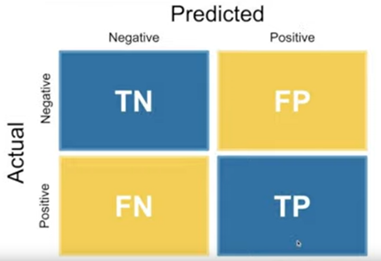

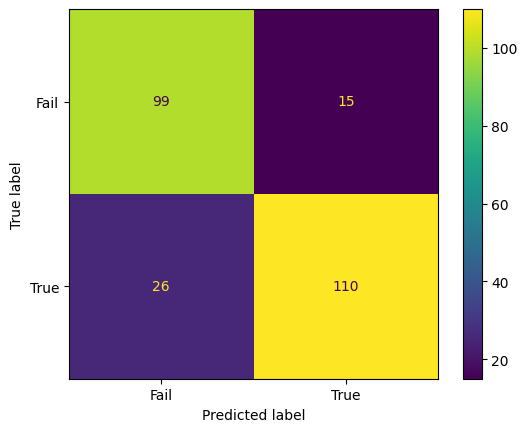

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Fail","True"])

disp.plot()

plt.show()

In [41]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)

# Option 2: If y_pred is from a different source and needs to be a subset of y_test:
# Ensure y_pred and the corresponding subset of y_test have the same length.
# For example, if y_pred corresponds to the first 6 samples of X_test:
y_test_subset = y_test[:len(y_pred)]
cm = confusion_matrix(y_test_subset, y_pred)

# Now you can print the confusion matrix
print(cm)
#cm = confusion_matrix(y_test, y_pred)
#print(cm)



[[ 99  15]
 [ 26 110]]


We can observe that the model generated the following Classifications:

True Negative = 99
False Negative = 15
True Positive = 110
False Negative = 26